# Домашнее задание к занятию
## "Ансамблирование"
Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)  
Построить случайный лес, вывести важность признаков  
Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную  
В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [1]:
# Загружаем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [2]:
# Загружаем датасет
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Получаем основную информацию о данных в датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Определяем количество пропусков для каждого признака. Выведем топ 25 признаков с наибольшим количеством пропусков
data.isna().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

In [5]:
# Разделяем на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), 
                                                    data['SalePrice'], test_size=0.30, random_state=42)

In [6]:
# Находим категориальные признаки
categorials = list(data.dtypes[data.dtypes == object].index)
categorials_nunique = X_train[categorials].nunique()
categorials_nunique

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        6
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      14
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        4
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [7]:
# Кодируем пропущенные значений строкой
data[categorials] = data[categorials].fillna('nan')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,nan,Reg,Lvl,AllPub,...,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,nan,Reg,Lvl,AllPub,...,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,nan,IR1,Lvl,AllPub,...,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,nan,IR1,Lvl,AllPub,...,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,nan,IR1,Lvl,AllPub,...,0,nan,nan,nan,0,12,2008,WD,Normal,250000


In [8]:
# Фильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]
integer

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [9]:
# Создаём дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

In [10]:
# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis=1)
X_test = pd.concat([X_test[integer].fillna(-999), dummy_test], axis=1)
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_Abnorml,Heating_Wall,Neighborhood_Gilbert,ExterCond_Fa,LotShape_IR2,GarageType_2Types,Electrical_FuseA,ExterCond_Gd,Neighborhood_ClearCr,HouseStyle_SFoyer
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,0,0,0,0,0,0,0,0,0,0
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,0,0,0,0,0,0,0,0,0
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,0,0,0,0,0,0,0,0,0
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,0,0,0,0,0,0,0,0,0
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,1,0,0,0,0,0


In [11]:
# Обучаем модель RandomForestRegressor
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train, y_train)
print(f'Качество модели на тренировочных данных - {RFR_model.score(X_train, y_train)}')
print(f'Качество модели на тестовых данных - {RFR_model.score(X_test, y_test)}')

Качество модели на тренировочных данных - 0.9759858451283369
Качество модели на тестовых данных - 0.887713423267914


При сравнении полученных данных о качестве модели на тренировочных и тстовых данных можно сделать вывод, что построенная модель переобучена.

In [12]:
# Определим наиболее важные признаки
important = pd.Series(RFR_model.feature_importances_)
important.sort_values(ascending=False).head(10)

4     0.540161
16    0.125922
14    0.034090
12    0.032291
9     0.027968
13    0.021164
26    0.020419
3     0.015154
27    0.014575
6     0.013788
dtype: float64

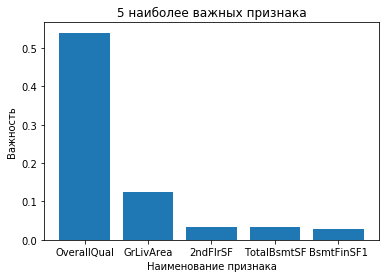

In [13]:
# Строим график 5 наиболее важных признаков
important.index = pd.Series(X_train.columns)
plt.title('5 наиболее важных признака')
plt.xlabel('Наименование признака')
plt.ylabel('Важность')
plt.bar(important.sort_values(ascending=False).head().index, important.sort_values(ascending=False).head())
plt.show()

Из полученных значений видим, что наиболее важным принаком является Overall Qual. Важность остальных признаков значительно ниже.

In [14]:
# Обучаем стекинг
stacking_model = StackingRegressor([('LinearRegression', LinearRegression()),
                                    ('KNeighborsRegressor', KNeighborsRegressor()),
                                    ('DecisionTree', DecisionTreeRegressor())], RidgeCV())
stacking_model.fit(X_train, y_train)
print(f'Качество модели на тренировочных данных - {stacking_model.score(X_train, y_train)}')
print(f'Качество модели на тестовых данных - {stacking_model.score(X_test, y_test)}')

Качество модели на тренировочных данных - 0.9423326819149775
Качество модели на тестовых данных - 0.8618993525402174


In [15]:
# Определим качество для каждой модели в стекинге
for model in stacking_model.named_estimators:
    print(f'Качество модели на тренировочных данных для модели {model} - {stacking_model.named_estimators_[model].score(X_train, y_train)}')
    print(f'Качество модели на тестовых данных для модели {model} - {stacking_model.named_estimators_[model].score(X_test, y_test)}\n')

Качество модели на тренировочных данных для модели LinearRegression - 0.9221085403562431
Качество модели на тестовых данных для модели LinearRegression - 0.8533836050579277

Качество модели на тренировочных данных для модели KNeighborsRegressor - 0.7419951520813983
Качество модели на тестовых данных для модели KNeighborsRegressor - 0.6775304068635524

Качество модели на тренировочных данных для модели DecisionTree - 1.0
Качество модели на тестовых данных для модели DecisionTree - 0.774523079983072



При использовании стекинга качество модели на тестовых данных выше, чем для каждой из модели, которую мы используем в стекинге.